Carga de datos y procesamiento

C:\Users\rrive\AppData\Local\Temp\ipykernel_65844\2067543492.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Datos[i].replace('S/D', np.nan, inplace=True)


Skewness of numeric attributes:
TEMPERATURA (°C)               0.331202
PRECIPITACIÓN (mm/hora)       21.704409
HUMEDAD (%)                   -0.759822
DIRECCION DEL VIENTO (°)      -0.137914
VELOCIDAD DEL VIENTO (m/s)     1.765410
dtype: float64


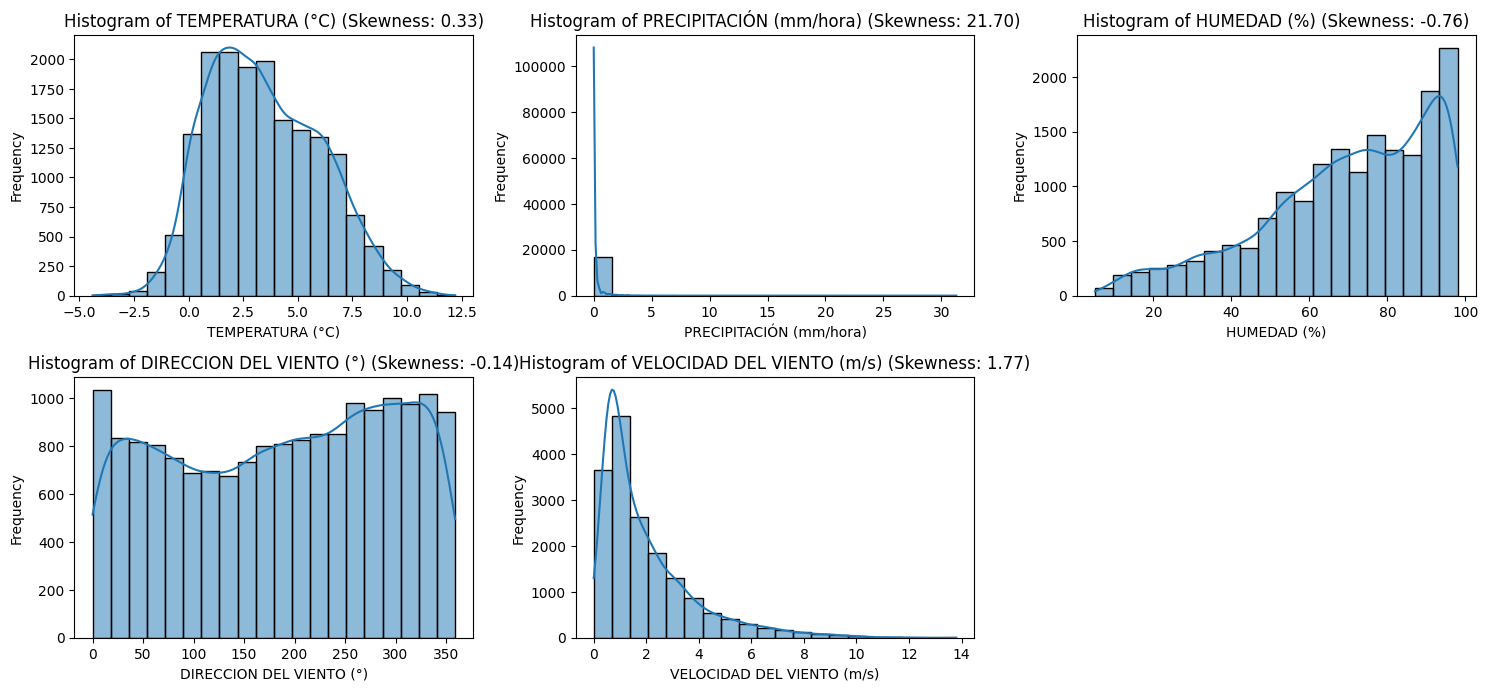

Skewness of numeric attributes:
TEMPERATURA (°C)             -0.035087
PRECIPITACIÓN (mm/hora)       2.938835
HUMEDAD (%)                  -1.081327
DIRECCION DEL VIENTO (°)     -0.499583
VELOCIDAD DEL VIENTO (m/s)    1.059418
dtype: float64


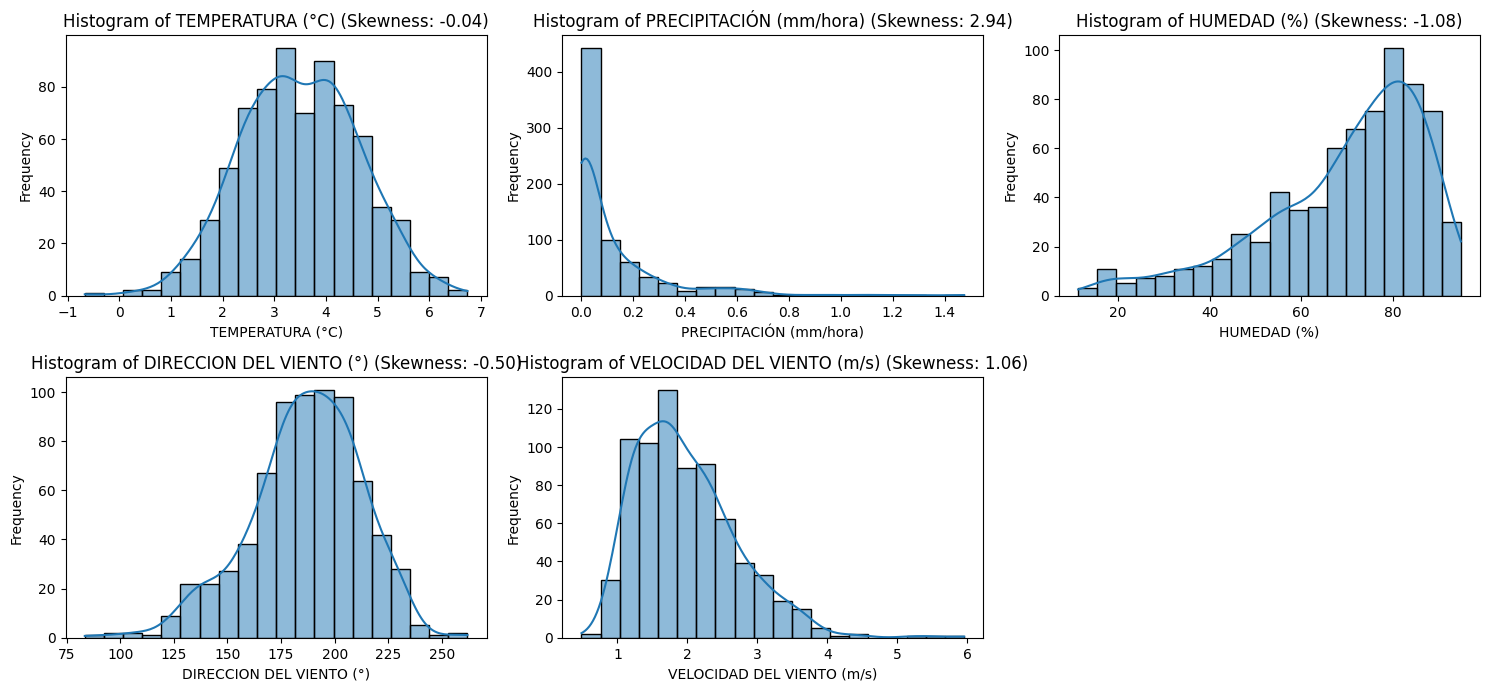

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import seaborn as sns
import pandas as pd
import numpy as np
import os

def visualizar_datos_skew():
    skewness_values = Datos[Columnas_].skew()
    print("Skewness of numeric attributes:")
    print(skewness_values)
    plt.figure(figsize=(15, 10))
    for i, attribute in enumerate(Columnas_):
        plt.subplot(3, 3, i + 1)
        sns.histplot(Datos[attribute], kde=True, bins=20)
        plt.title(f'Histogram of {attribute} (Skewness: {skewness_values[attribute]:.2f})')
        plt.xlabel(attribute)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def visualizar_datos_box():
    plt.figure(figsize=(20, 10))
    plt.tight_layout()
    for i, attribute in enumerate(Columnas_):
        plt.subplot(1, 6, i + 1)
        sns.boxplot(Datos[attribute])
        plt.title(f'Box plot of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Rango')

    plt.tight_layout()
    plt.show()

Periodos = [i for i in os.listdir() if "csv" in i]
Datos = pd.DataFrame()
for Periodo in Periodos:
    Datos_periodo = pd.read_csv(Periodo,skiprows=5)
    Datos = pd.concat([Datos, Datos_periodo], axis=0, ignore_index=True)

Columnas_ = ['TEMPERATURA (°C)','PRECIPITACIÓN (mm/hora)','HUMEDAD (%)','DIRECCION DEL VIENTO (°)','VELOCIDAD DEL VIENTO (m/s)']
for i in Columnas_:
    Datos[i].replace('S/D', np.nan, inplace=True)
Datos[Columnas_] = Datos[Columnas_].astype(float)
Datos['FECHA_CORTE'] = pd.to_datetime(Datos['AÑO / MES / DÍA'] + ' ' + Datos['HORA'])
Datos.drop(['AÑO / MES / DÍA','HORA'],axis='columns',inplace=True)
Datos.dropna(subset=Columnas_, inplace=True)
Datos.set_index('FECHA_CORTE', inplace=True)


visualizar_datos_skew()
Datos = Datos.resample('D').mean()
visualizar_datos_skew()


#Escalado de datos
scaler = MinMaxScaler()
Datos[Columnas_] = scaler.fit_transform(Datos[Columnas_])

#Se guardan los datos procesados
Datos.to_csv('Datos_meteorologicos_procesados.csv')

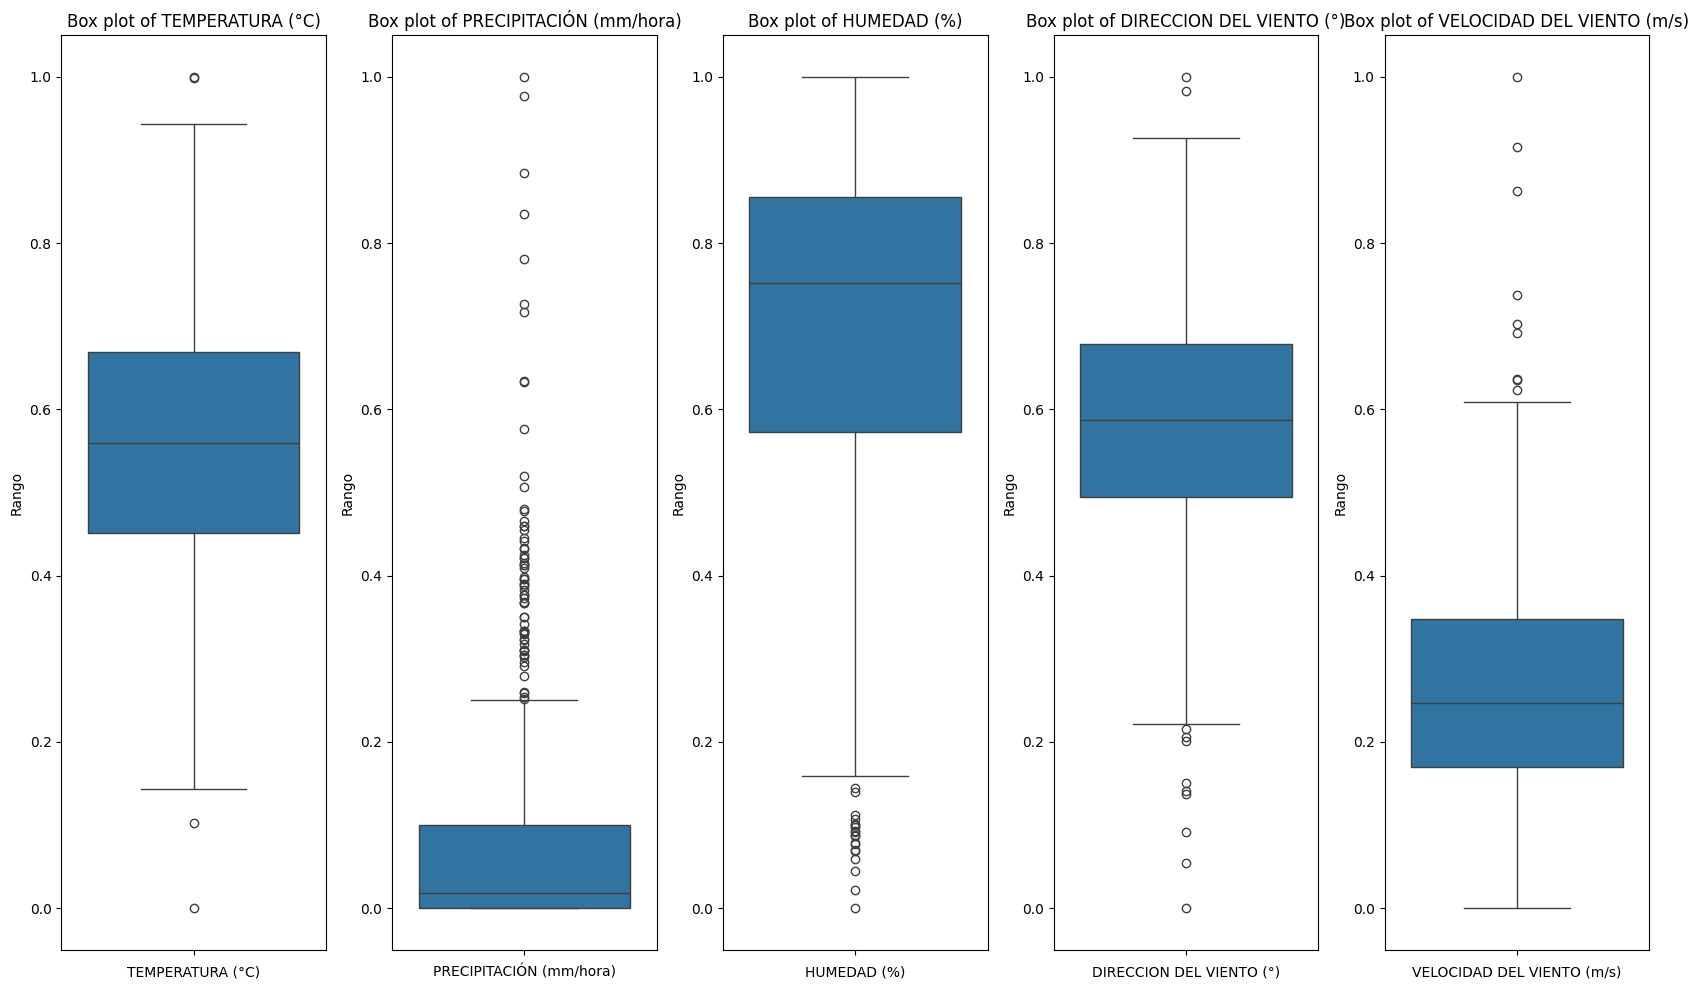

In [3]:
visualizar_datos_box()